<a href="https://colab.research.google.com/github/HackSlash79/hamletWordcloud/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
from operator import itemgetter
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
!pip install requests
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text
blob = TextBlob(data)
stop_words = stopwords.words('english')


In [4]:
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

Getting word frequencies

In [ ]:
items = blob.word_counts.items()
items

Eliminating Stop Words

In [ ]:
items = [item for item in items if item[0] not in stop_words]
items

Sorting the words by frequency

In [ ]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
sorted_items

Getting top 20 words

In [31]:
top20 = sorted_items[1:21]

Convert to Dataframe

In [48]:
df = pd.DataFrame(top20, columns=['word', 'count'])

Visualizing dataframe

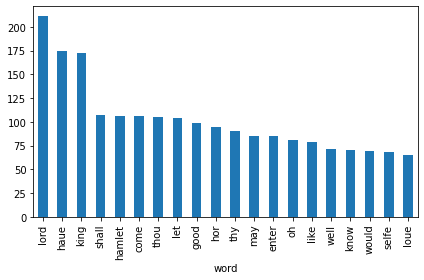

In [34]:
axes = df.plot.bar(x= 'word', y='count', legend=False)
plt.gcf().tight_layout()

Generate the word cloud

In [36]:
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

In [56]:
wordcloud = wordcloud.generate(data)

In [58]:
wordcloud = wordcloud.to_file('hamletcloud.png')


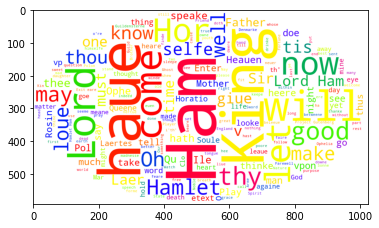

In [59]:
plt.imshow(wordcloud)